# Исследование исторических данных о продажах игр

В распоряжение аналитика из открытых источников предоставлены ретроспективные данные о продажах компьютерных игр, включающее в себя информацию об оценках пользователей и критиков, жанрах и платформах, на которых эти игры выпускались.

***Цель исследования***

Выявить определяющие успешность игры закономерности, что позволит в дальнейшем сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

***Ход исследования***

Все необходимые данные для исследования содержатся в файле по адресу:  `/datasets/games.csv`. 

В процессе проведения исследования планируются предпринять следующие шаги:

1. В самом начале необходимо проверить данные на ошибки, оценить варианты их исправления и применить их без риска искажения конечного результата.
2. На следующем этапе следует провести исследовательский анализа данных, изучить основные параметры, построить их распределения и отрисовать графики, отображающие основную динамику и зависимость прибыльности рынка компьютерных игр от его основных характеристик (платформа, на которой выпускалась игра, жанр игры и т.д.).
3. Также необходимо более детально изучить портрет среднестатистического пользователя каждого региона: какие жанры более популярны в Северной Америке, какими игровыми приставками предпочитают пользоваться игроки в Европе, как рейтинги игр влияют на их продаже в Японии.
4. В дополнение целесообразно сравнить средние оценки по жанрам и платформам, на примере конкретных игровых приставок и жанров.
5. На заключительном этапе останется проанализировать все данные и написать общий вывод.

Первый этап -  изучить представленную выборку и сделать ее максимально репрезентативной, что увеличит достоверность общих выводов.

## Изучение файла с данными и общей информации 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\Users\Marina\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Marina\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Marina\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
try:
    data = pd.read_csv('datasets/games.csv') 
except:
    data = pd.read_csv('datasets/games.csv')
    
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
print('Общее количество игр, выпущенных на всех платформах:', data.shape[0])

Общее количество игр, выпущенных на всех платформах: 16715


In [5]:
print('Первый год исследования:', data['Year_of_Release'].min())
print('Последний год исследования:', data['Year_of_Release'].max())

Первый год исследования: 1980.0
Последний год исследования: 2016.0


In [6]:
print('Количество платформ:', len(data['Platform'].unique()))

Количество платформ: 31


### Вывод по разделу

В распоряжении аналитика имеется сводная таблица с компьютерными играми, выпущенными в период с 1980 по 2016 года на более чем 30 платформах. Общее количество игр составляет более 16 с половиной тысяч. Помимо года релиза по каждой игре представлена следующая информация:
- продажи по основным крупным регионам в млн копий (Северная Америка, Европа, Япония и остальные страны), 
- название платформы, на которой вышла игра, 
- жанр игр, 
- оценки критиков и пользователей, 
- рейтинг игры от организации ESRB - ассоциация, присваивающая подходящую возрастную категорию.

В представленном датасете имеются пропущенные значения в некоторых столбцах, что, в свою очередь, может ухудшать качество данных. Таким образом, перед тем как приступить к исследовательскому анализу данных, необходимо выполнить их предобработку.

## Подготовка данных

### Изменение названий столбцов

На первоначальном этапе для облегчения дальнейшей работы с данными необходимо единообразие названий столбцов в таблице, а именно приведение их к нижнему регистру.

In [7]:
data.columns = data.columns.str.lower()

### Обработка дубликатов

####  Явные дубликаты

In [8]:
print('Количество явных дубликатов:',data.duplicated().sum())

Количество явных дубликатов: 0


Согласно полученным данным, в изучаемом датасете отсутствуют явные дубликаты, т.е. когда одна строка на 100% схожа с другой (другими) строками.

#### Неявные дубликаты

Для поиска неявных дубликатов проанализируем уникальные названия значений в столбцах "Жанр", "Платформа", "Год выпуска" и "Рейтинг ESRB".

##### Жанр

In [9]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Согласно классификации, используемой в имеющемся датасете, существуют следующие жанры игр:
1. Экшн - `Action`: сущность экшенов отражает их название – в переводе с английского оно означает «действие», и здесь игрок находится в самом центре действия и управляет им. Главным образом оно связано с физическими испытаниями, которые нужно преодолеть.

2. Приключенческая игра -`Adventure` : один из основных жанров компьютерных игр, представляющий собой интерактивную историю с главным героем, управляемым игроком. Важнейшими элементами игры в жанре квеста являются собственно повествование и исследование мира, а ключевую роль в игровом процессе играет решение головоломок и задач, требующих от игрока умственных усилий.

3. Файтинги - `Fighting`: в файтингах, в частности, Mortal Kombat и Street Fighter II, все действие сосредоточено на боях, которые чаще всего проходят в форме единоборств. 

4. Мультижанровые игры - `Misc`.

5. Платформеры - `Platform`: платформеры получили свое название благодаря тому, что в процессе игры ее главный персонаж взаимодействует с платформами – обычно бегает, прыгает или падает.

6. Головоломка - `Puzzle`: ключевую роль играет решение головоломок, загадок и других задач.

7. Гонки - `Racing`: одни из наиболее популярных игр этой категории – гоночные симуляторы серий Forza, Grand Turismo и Need for Speed. Здесь игроки участвуют в гоночных заездах против соперников или на время.

8. Ролевые игры - `Role-Playing`: в нем часто встречаются средневековые или фэнтезийные сеттинги, что главным образом связано с происхождением жанра.

9. Шутеры - `Shooter`: шутеры позволяют игрокам использовать в своих действиях оружие, обычно с целью уничтожить врагов или противоборствующих игроков.

10. Симуляторы - `Simulation`: у представителей жанра симуляторов есть одна общая черта – все они созданы для симуляции реальных или вымышленных систем, ситуаций или событий.

11. Спортивные игры - `Sports`: спортивные игры, как и следует из названия, симулируют различные виды спорта, например, гольф, баскетбол, обычный и американский футбол.

12. Стратегии - `Strategy`: геймплей этого жанра уходит своими корнями в традиционные настольные стратегические игры. Часто в этих играх вам доступен целый мир и все его ресурсы, а чтобы справиться с испытаниями, игроку требуется тщательно продумывать стратегию и тактику.

Неявные дубликаты в столбце "Жанр" отсутствуют.

##### Платформа

In [10]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Посмотрим на разбивку по годам их существования.

In [11]:
platforms = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
platforms.columns=['Первый год выпуска', 'Последний год выпуска']
platforms.index.names = ['Платформа']
platforms = platforms.sort_values(by='Последний год выпуска')
platforms['Срок существования'] = platforms['Последний год выпуска'] - platforms['Первый год выпуска'] + 1
platforms.loc[platforms['Последний год выпуска'] == 2016.0, 'Срок существования'] = '-'
platforms 

,Первый год выпуска,Последний год выпуска,Срок существования
Платформа,,,
2600,1980.0,1989.0,10.0
GG,1992.0,1992.0,1.0
SCD,1993.0,1994.0,2.0
GEN,1990.0,1994.0,5.0
NES,1983.0,1994.0,12.0
3DO,1994.0,1995.0,2.0
TG16,1995.0,1995.0,1.0
NG,1993.0,1996.0,4.0
PCFX,1996.0,1996.0,1.0


Неявные дубликаты в столбце "Платформа" отсутствуют.

##### Год выпуска

In [12]:
sorted(data['year_of_release'].unique())

[1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 nan]

Неявные дубликаты в столбце "Год выпуска" отсутствуют.

##### Рейтинг RSRB

In [13]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association (современное название — «Entertainment Software Association»). 
На 2016 год существовала следующая система рейтинга:
1. «EC» («Early childhood») — «Для детей младшего возраста»
2. «E» («Everyone») — «Для всех»: первоначально "K-A" ("Kids to Adults")
3. «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
4. «T» («Teen») — «Подросткам»
5. «M» («Mature») — «Для взрослых»
6. «AO» («Adults Only 18+») — «Только для взрослых»
7. «RP» («Rating Pending») — «Рейтинг ожидается».  Продукт был отправлен в ESRB и ожидает присвоение рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официального релиза. 

Как видно из списка названий рейтингов в текущем датасете, рейтинг К-А и рейтинг Е означают одно и тоже. Таким образом, необходимо заменить К-А на Е.

In [14]:
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

##### Оценка пользователей

In [15]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Шкала рейтинга с оценками пользователей выстраивается от 0 до 10, при этом в списке уникальных значений встречается 'tbd', значение которого будет пояснено далее по исследованию.

##### Оценка критиков

In [16]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Шкала рейтинга выстраивается от 0 до 100.

### Обработка пропущенных значений

In [17]:
pd.DataFrame(round(data.isna().mean()*100,2)).style.background_gradient('coolwarm')

,0
name,0.010000
platform,0.000000
year_of_release,1.610000
genre,0.010000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.320000
user_score,40.090000


In [18]:
data.isna().sum().sort_values()

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
user_score         6701
rating             6766
critic_score       8578
dtype: int64

В исследуемом архиве присутствуют по 2 пропуска в столбцах "Название игры" и "Жанр", а также в 269 случаях не указан год выпуска. С учетом того, что суммарная доля строк с пропущенными значениями в этих столбцах составляет всего 1,63 % от общего количества, целесообразно удалить данные строки без риска потери качества данных и влияния данного решения на дальнейшее исследование.

In [19]:
data = data.dropna(subset=['name','year_of_release', 'genre'])

Таким образом, более чем 50% исследуемого объема данных имеют пропущенные значения в столбце "Оценка критиков" и по 40% в столбцах "Оценка пользователей" и  "Рейтинг от организации ESRB".

#### Причины пропущенных значений

##### Рейтинг от организации ESRB

Как было уже отмечено ранее, организация ESRB начала свое существование в 1994 году, поэтому отсутствие значений в изучаемом столбце у игр, выпущенных до 1994 году, вполне объяснимо.

Отсутствие рейтинга у игр после 1994 может быть связано с самим механизмом присвоения рейтинга. 
Дело в том, что ESRB — это негосударственная организация и разработчики игр добровольно присылают видео игрового процесса и другие материалы оценочной комиссии. Обусловлено это тем фактом, что что большинство розничных торговых сетей просто отказываются реализовывать игры без рейтинга возрастного ограничения. Однако существуют и другие значимые рейтинговые системы компьютерных игр, например:
- европейская PEGI (Pan European Game Information),
- немецкая USK (Unterhaltungssoftware Selbstkontrolle),
- немецкая CERO (Computer Entertainment Rating Organization).

Возможно, при выборе рейтинговой компании производитель игр остановил свой выбор на альтернативном варианте.

##### Оценка критиков и оценка пользователей

После анализа имеющихся ресурсов по оценке игр было выявлено, что в качестве пользовательских оценок и оценок критиков в имеющейся базе данных были использованы рейтинги METACRITIC - англоязычного сайта-агрегатора, собирающего отзывы о музыкальных альбомах, играх, фильмах, телевизионных шоу, DVD-дисках и мобильных играх. Проект существует с 2001 года.

Рейтинг игры METACRITIC может быть двух видов:

1. Рейтинг изданий. Каждое издание имеет «свой вес» в оценке игры. То есть, малоизвестное игровое издание может поставить 100 баллов из 100, но известное издание поставит 80 из 100 и эта оценка будет иметь большее влияние.

2. Рейтинг пользователей. Выставляется по 10-ти бальной шкале.

Пропуски в играх, выпущенных до 2001 года, вполне объяснимы, а наличие пропущенных значений в этих столбцах у игр, выпущенных после 2001 года, может быть связано с тем, что на сайте METACRITIC оценка соответствующей игры не производилась.

#### Заполнение пропущенных значений

В данном случае имеющиеся пропуски в столбцах "Рейтинг", "Оценка пользователей" и "Оценка критиков" было решено обработать следующим образом:
- заполнение пропусков в столбцах "Оценка пользователей" и "Оценка критиков" возможными вариантами (медиана или среднее значение) лишь приведет к искажению выводов при дальнейшем анализе, поэтому они остались нетронутыми. 
- заполнение пропусков в категорийной переменной "Рейтинг" одним из вариантов имеющихся значений рейтинга не приведет к какому-либо результату, имеющему смысловую нагрузку. Но для того, чтобы не терять столь значительную часть выборки, целесообразно присвоить тем играм, у которых рейтинг отсутствует, значение "Unknown", т.е. установить т.н. "заглушку".

In [20]:
data.loc[data['rating'].isna(), 'rating'] = 'Unknown'

#### Аббревиатура 'tbd'

Как было выяснено ранее, в столбце с оценкой пользователя встречается значение `tbd`. 

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.

Таким образом, получается, что у части игр еще не определена итоговая оценка пользователя. Наиболее корректным будет являться замена `tbd` на `Nan`.

In [21]:
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan

### Изменение типов данных

Еще раз выведем таблицу с типом данных в столбцах анализируемой выборки.

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Необходимо поменять тип данных в следующих столбцах:
- year_of_release на int - так как в данном случае год может принимать только натуральное значение,
- user_score на float - для удобства проведения вычисления в дальнейшем анализе.

In [23]:
data['year_of_release'] = data['year_of_release'].astype(int)
data['user_score'] = pd.to_numeric(data['user_score'], errors='raise')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


In [25]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown


### Вычисление суммарных продаж по регионам

Для более комплексной оценки продаж создадим новый столбец, который будет в себе содержать суммарную продажу для каждой из игр по всем регионам.

In [26]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

### Вывод по разделу

В рамках данного раздела была проведена предобработка данных для повышения качества исходного датасета, а именно: 

- приведены к единообразию названия столбцов,
- исключены повторения в столбце "Рейтинг ESRB",
- изучены причины и заполнены пропуски в тех столбцах, где это было корректно и уместно, исключая влияние на дальнейший анализ,
- изменены типы данных в нескольких столбцах для более удобной работы с этими значениями далее по ходу исследования,
- добавлены новый столбец с общими продажами каждой игры.

На выходе был получен улучшенный набор данных, на основании которого уже возможно проводить исследовательский анализ, а также выявлять зависимости между успешностью игры и ее параметрами.

## Исследовательский анализ данных

### Динамика выпуска игр по годам

Для начала необходимо посмотреть на развитие рынка компьютерных игр за анализируемый период.

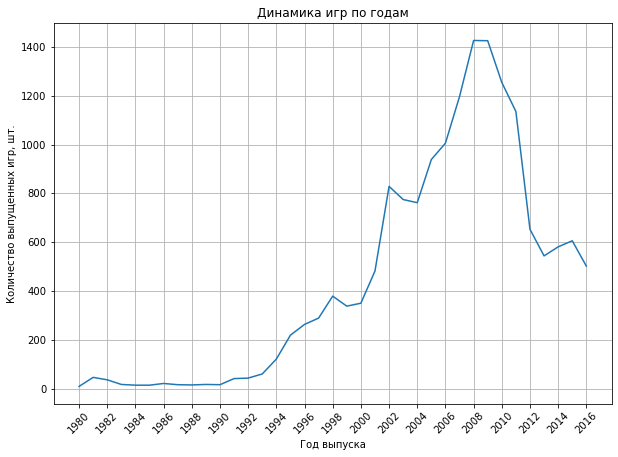

In [27]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(
    legend=False, 
    grid=True,
    figsize=(10,7),
    xticks=range(1980,2017,2),
    rot=45)
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр, шт.')
plt.title('Динамика игр по годам')
plt.show()

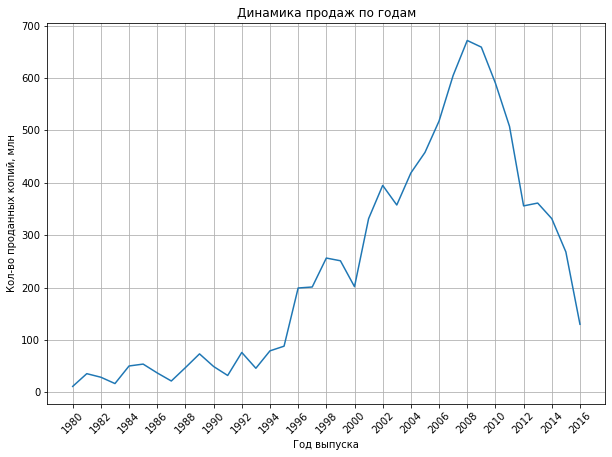

In [28]:
data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
    legend=False, 
    grid=True,
    figsize=(10,7),
    xticks=range(1980,2017,2),
    rot=45)
plt.xlabel('Год выпуска')
plt.ylabel('Кол-во проданных копий, млн')
plt.title('Динамика продаж по годам')
plt.show()

Как видно из графиков выше, динамика количества выпущенных игр по годам и количества проданных копий в общем схожи.

Рынок компьютерных игр получил бурное развитие в начале 1990х годов, что объясняется началом компьютерной эры и доступностью покупки персонального компьютера для обычного пользователя. Также произошло развитие технологий, сопутствующих компьютерным играм. Наиболее значимые:

- широкое внедрение CD-ROM для распространения и хранения данных;
- существенное развитие технологий трехмерной графики и широкое распространение 3D графических процессоров, переход к трехмерной графике как к стандарту де-факто визуализации игр;
- появление и распространение интернета, в результате чего во второй половине десятилетия стала доступной совместная игра, что привело к появлению киберспорта.
- и др.

Рынок компьютерных игр, как и многие сферы экономики в тот период, достиг пика в 2008 году. Этот год ознаменовался началом мирового экономического кризиса, который начался с ипотечного кризиса в США, банкротства банков и падения цен на акции.
Также ослаблению консольных игр поспособствовал рост популярности игр на мобильных платформах. Миниатюризация аппаратного обеспечения и массовое распространение мобильных телефонов способствовало появлению мобильных игровых приложений и перетягиванию части пользователей на себя. 

Если рассматривать показатель выпуска игр, то с начала 2013 года наблюдается плавный рост рынка компьютерных игр. Ввиду того, что данные за 2016 год могут быть неполными, однозначно утверждать, что в 2016 году наблюдается отрицательная динамика, некорректно.

Если рассматривать по количеству проданных копий, то небольшое оживление в 2013 году вновь сменяется падением.

Данные за все периоды для поставленных целей исследования неважны, однако понаблюдать за динамикой рынка интересно.

### Динамика выпуска игр по платформам

Изучим, как менялись продажи по платформам.

In [29]:
most_platforms = data.groupby('platform').agg({'total_sales':'sum'}) \
    .sort_values(by = 'total_sales', ascending = False) 

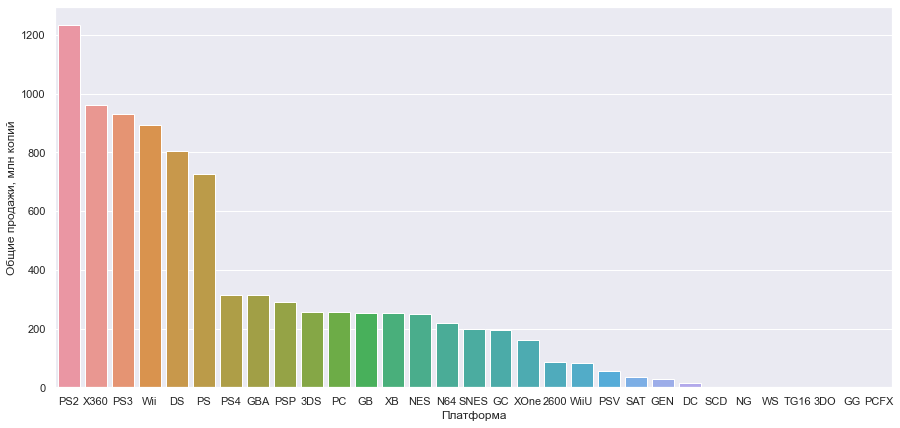

In [30]:
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(x=most_platforms.index, y=most_platforms['total_sales'])
plt.xlabel('Платформа')
plt.ylabel('Общие продажи, млн копий')
plt.show()

Как видно из графика выше, платформами с наибольшими суммарными продажами являются PS2, X360, PS3, Wii, DS и PS. Их общие продажи превышает 500 млн копий за исследуемый период, очевидно, что именно их можно признать крупнейшими игроками рынка компьютерных игр.

In [31]:
total_sales_other = most_platforms.loc['PS4':,'total_sales'].sum()
most_platforms.drop(most_platforms.index[6:31], axis=0, inplace=True)
most_platforms.loc["Other"] = [total_sales_other]

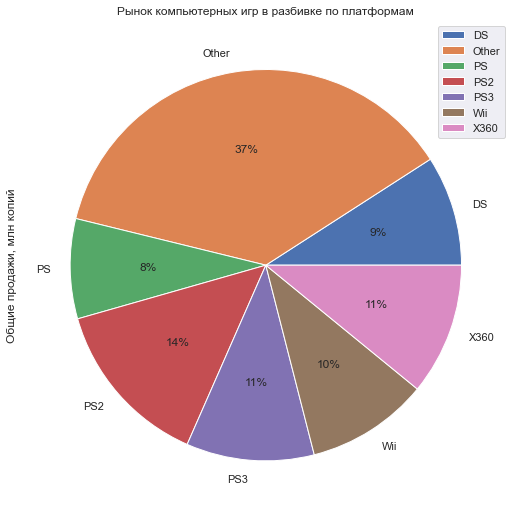

In [32]:
(most_platforms
 .groupby(['platform'])
 .sum()
 .plot(
     kind='pie', 
     y='total_sales',
     autopct='%1.0f%%',
     figsize=(15,9),
     title='Рынок компьютерных игр в разбивке по платформам'));
plt.ylabel('Общие продажи, млн копий')
plt.show()

Круговая диаграмма выше, показывает, что 2/3 игр за период с 1980-2016 гг. выпускались на основных 6 платформах. 

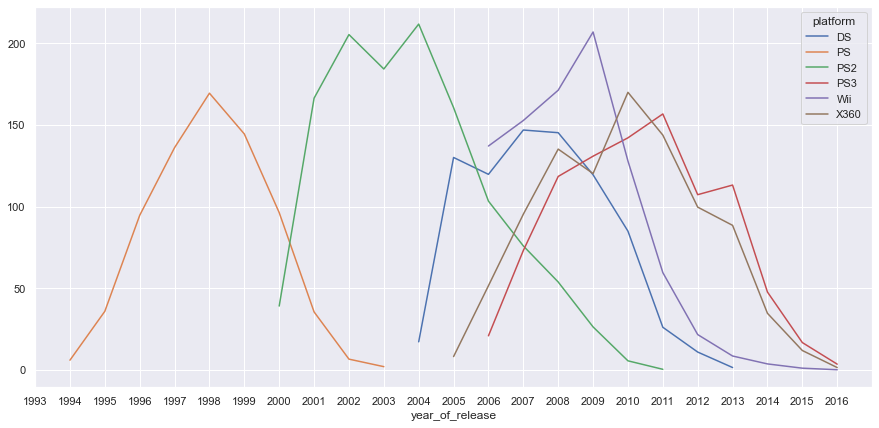

In [33]:
dimamika = data.loc[data['platform'].isin(["PS2", "X360", "PS3", "Wii", "DS", "PS"])] \
.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
dimamika.plot(
    xlim=(1993,2017),
    xticks = range(1993,2017),
    grid=True,
    figsize=(15,7));

Согласно визуализации, полученной выше, 3 из 6 крупнейших платформ не дожили до конца исследуемого периода, это PS, PS2 и DS. Половина оставшихся платформ, в лице Wii, X360 и PS3 еще держатся на плаву, хотя тенденция к угасанию уже наметилась.

Отталкиваясь от графика выше, можно сделать вывод, что в среднем жизненный цикл платформы составляет около 10 лет.

### Определение акутального периода

Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. Компьютерные игры - динамично меняющаяся индустрия, которая оперативно реагирует на нововведения из области высоких технологий и активно внедряет их в использование, быстро появляютя новые жанры и также быстро меняются предпочтения игроков .

При этом, так как данные за 2016 год неполные:
1. для того, чтобы оценить динамику, целесообразно взять 2 последних года, по которым есть  информация по продажам, но и также захватить 2016 год, который будет отображать намечающиеся тренды. Таким образом, для пункта 3.4. исследования в качестве актуального периода был выбран 2014-2016 гг. 
2. для остального исследования - логичнее оставить только 2015-2016 гг.

In [34]:
data_din = data.query('year_of_release > 2013')
data_new = data.query('year_of_release > 2014')

### Изучение прибыльности платформ

In [35]:
dnp = data_din.groupby('platform').agg({'total_sales':'sum'}) \
    .sort_values(by = 'total_sales', ascending = False)

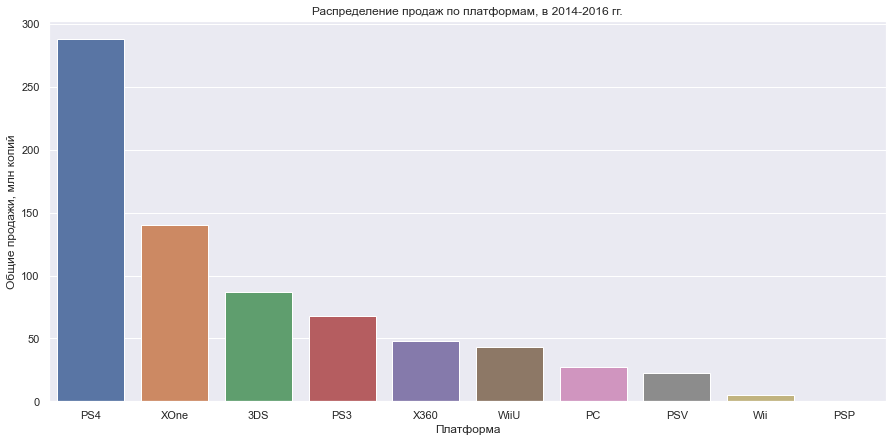

In [36]:
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(x=dnp.index, y=dnp['total_sales'])
plt.xlabel('Платформа')
plt.ylabel('Общие продажи, млн копий')
plt.title('Распределение продаж по платформам, в 2014-2016 гг.')
plt.show()

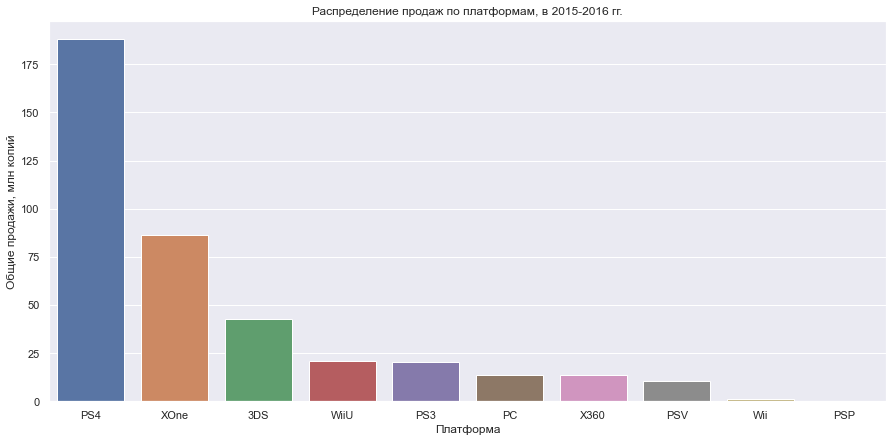

In [37]:
dnp2 = data_new.groupby('platform').agg({'total_sales':'sum'}) \
    .sort_values(by = 'total_sales', ascending = False)
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(x=dnp2.index, y=dnp2['total_sales'])
plt.xlabel('Платформа')
plt.ylabel('Общие продажи, млн копий')
plt.title('Распределение продаж по платформам, в 2015-2016 гг.')
plt.show()

За последние 2,5 года игровой индустрии на рынке присутствовали 10 платформ. За рассматриваемый период, наиболее прибыльной платформой оказалась PS4, ее продажи составляют более 250 млн копий. В тройку лидеров входят также Xone и 3DS.

При этом, если сравнить распределение игр по платформама за последние 2,5 года и 1,5 года, видно как происходит перестановка сил: вырывается вперед WiiU и начинает отставать X360.

Однако для того, чтобы определить потенциальную прибыльность платформы в будущем, необходимо знать фазу жизненного цикла, в которой она находится, т.е. посмотреть показатели продаж в динамике.

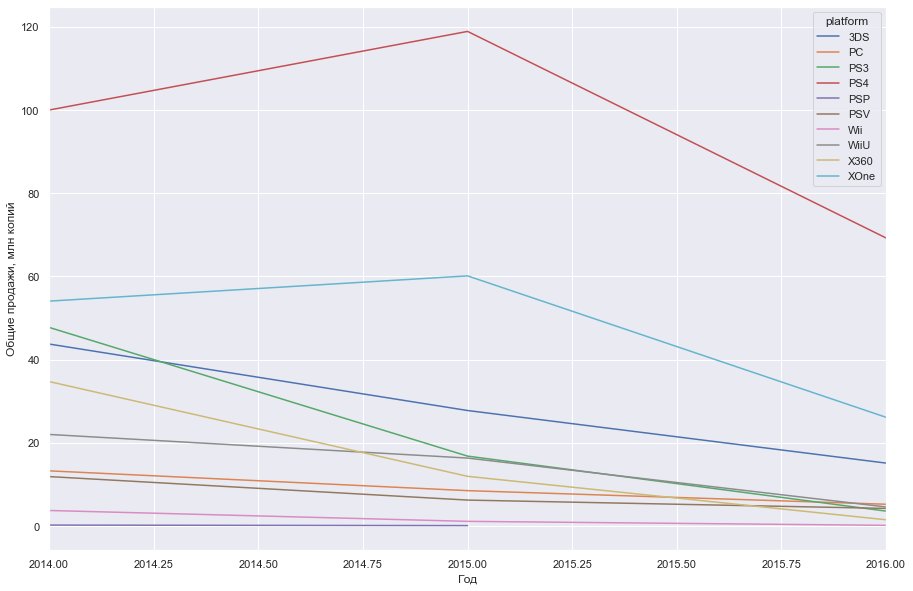

In [38]:
data_din \
.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum') \
.plot(
    xlim=(2014,2016),
    grid=True,
    figsize=(15,10))
plt.xlabel('Год')
plt.ylabel('Общие продажи, млн копий')
plt.show()

Т.к. данные за 2016 год являются неполными, при определении тенденций развития рынка более корректно опираться на данные вплоть до конца 2015 года. 
Судя по полученному графику:
- на данный момент только 2 платформы, которые показывают рост - Xone и PS4. 
- платформа PSP окончательно ушла с рынка в 2016 году.
- остальные платформы показывают падение в продажах.

###  Гистограмма размаха по глобальным продажам игр в разбивке по платформам

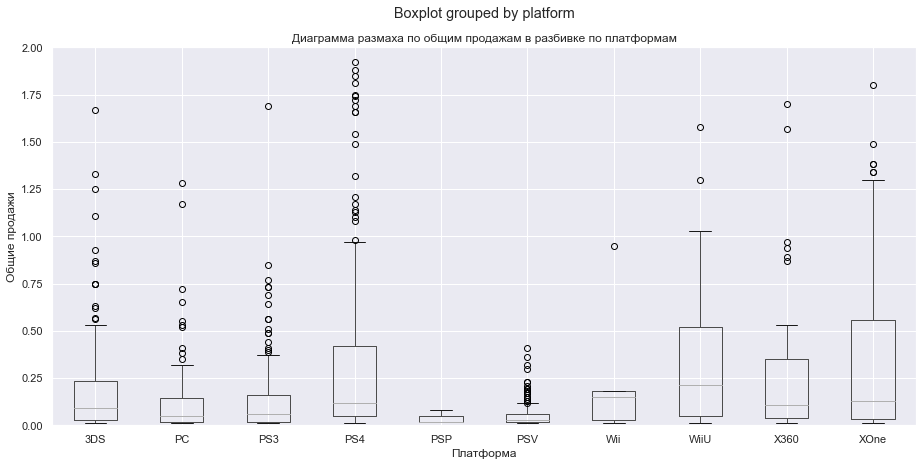

In [39]:
data_new.boxplot(
    column='total_sales', 
    by='platform',
    grid=True)
plt.xlabel('Платформа')
plt.ylabel('Общие продажи')
plt.title('Диаграмма размаха по общим продажам в разбивке по платформам')
plt.ylim(0,2)
plt.show()

In [40]:
data_new.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,132.0,0.325152,0.798620,0.01,0.030,0.090,0.2325,7.14
PC,104.0,0.132404,0.209449,0.01,0.020,0.050,0.1425,1.28
PS3,111.0,0.183964,0.342696,0.01,0.020,0.060,0.1600,2.70
PS4,301.0,0.625083,1.457063,0.01,0.050,0.120,0.4200,14.63
PSP,3.0,0.040000,0.034641,0.02,0.020,0.020,0.0500,0.08
PSV,195.0,0.053846,0.063669,0.01,0.020,0.030,0.0600,0.41
Wii,5.0,0.264000,0.390487,0.01,0.030,0.150,0.1800,0.95
WiiU,42.0,0.498810,0.850240,0.01,0.050,0.215,0.5175,4.44
X360,48.0,0.280833,0.381207,0.01,0.040,0.110,0.3525,1.70


Медиана общих продаж у разных платформ разная и находится в диапазоне от 0,02 до 0,25 млн копий у игры:
1. в тройку с самими низкими медианами попадат платформы: PC, PSP и PSV.
2. в тройку с самыми высокими медианами попали PS4, WiiU, XOne.

При этом, из  "ящика с усами", наглядно видно, что наиболее успешные платформы, помимо более высокой медианы, также показывают и более широкий размах усов.
Например, у 50% игр, выпущенных на платформе PS4, общие продажи по миру составили до 0,5 млн копий, тогда как аналогичный показатель и игр, выпущенных на платформе PSV, составил примерно 0,1 млн копий, что явно свидетельствует о более высокой прибыльности первой платформы по сравнению со второй.

Таким образом, можно определить ***шестерку наиболее прибыльных платформ*** игровой индустрии: PS4, WiiU, XOne, 3DS, PS3, X360.

###  Влияние отзывов пользователей и критиков на продажи 

На примере платформы PS4 выявим, влияют ли отзывы критиков и пользователей на продажи игр. 

In [41]:
data_PS4 = data_din.query('platform == "PS4"')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


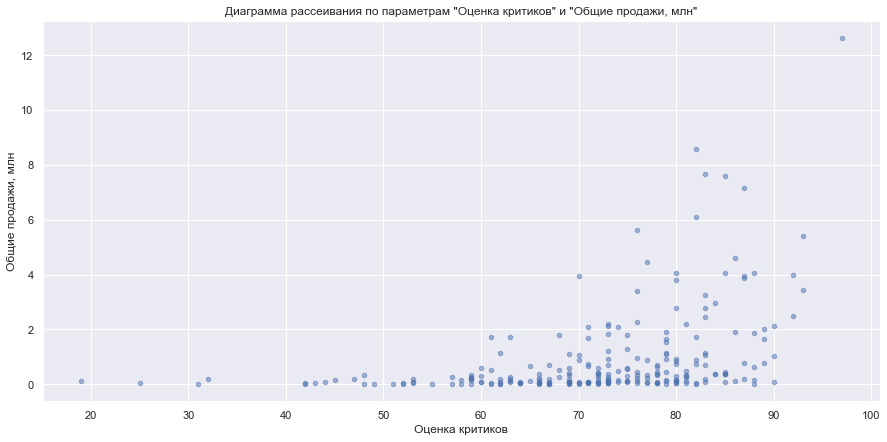

In [42]:
data_PS4.plot(
    x='critic_score', 
    y='total_sales',
    kind='scatter', 
    alpha=0.5, 
    grid=True, 
    title='Диаграмма рассеивания по параметрам "Оценка критиков" и "Общие продажи, млн"',
    xlabel='Оценка критиков',
    ylabel='Общие продажи, млн');

In [43]:
(print('Коэффициент корреляции между общими продажами и оценкой критиков составляет', 
       round(data_PS4['total_sales'].corr(data['critic_score']),2)))

Коэффициент корреляции между общими продажами и оценкой критиков составляет 0.4


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


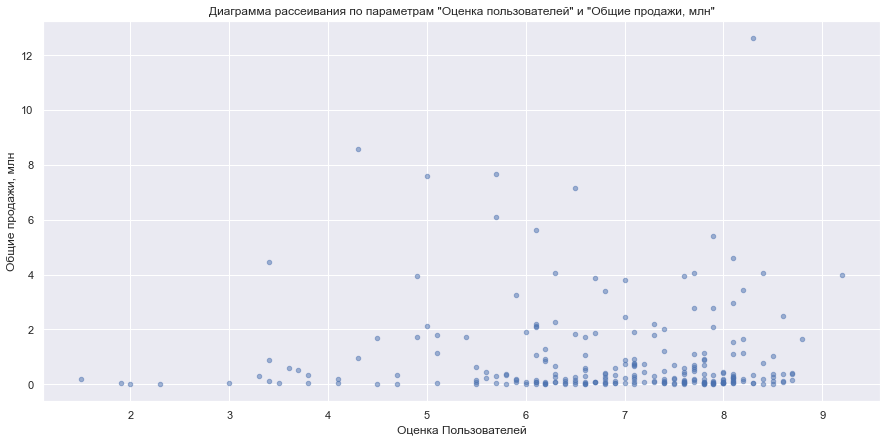

In [44]:
data_PS4.plot(
    x='user_score', 
    y='total_sales',
    kind = 'scatter', 
    alpha=0.5, 
    grid = True, 
    title='Диаграмма рассеивания по параметрам "Оценка пользователей" и "Общие продажи, млн"',
    xlabel='Оценка Пользователей',
    ylabel='Общие продажи, млн'); 

In [45]:
(print('Коэффициент корреляции общими продажами и оценкой пользователей составляет', 
       round(data_PS4['total_sales'].corr(data_PS4['user_score']),2)))

Коэффициент корреляции общими продажами и оценкой пользователей составляет -0.04


В соответствии с полученными результатами, зависимость продаж компьютерных игр от оценки критиков имеется. Чем выше оценка критиков, тем выше вероятность, что эта игра будет популярна среди геймеров. Оценка пользователей не оказывает никакого влияния на продажи игр.

###  Продажи игр на других платформах

На основании анализа данных по других платформам, выясним, являются ли выводы, полученные в предыдущем разделе, общей картиной взаимосвязи продаж игр и отзывов критиков и пользователей. При этом, в качестве актуального периода для использования большего количества данных и повышения точности полученных значений корреляции используем данные 2014-2016 гг.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

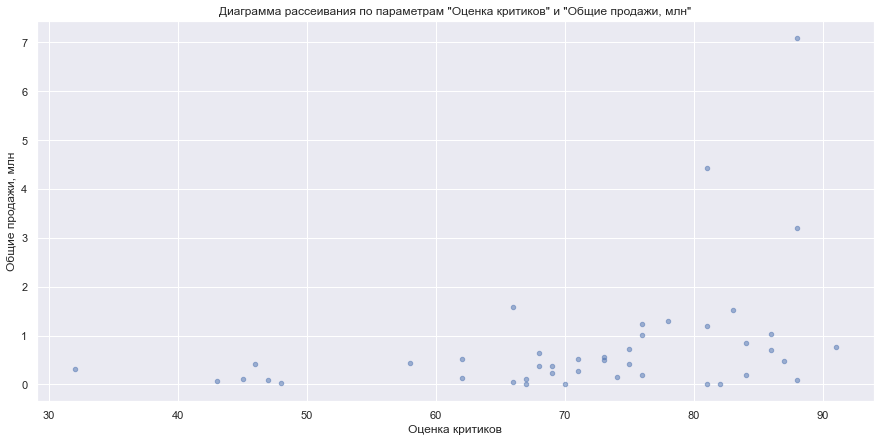

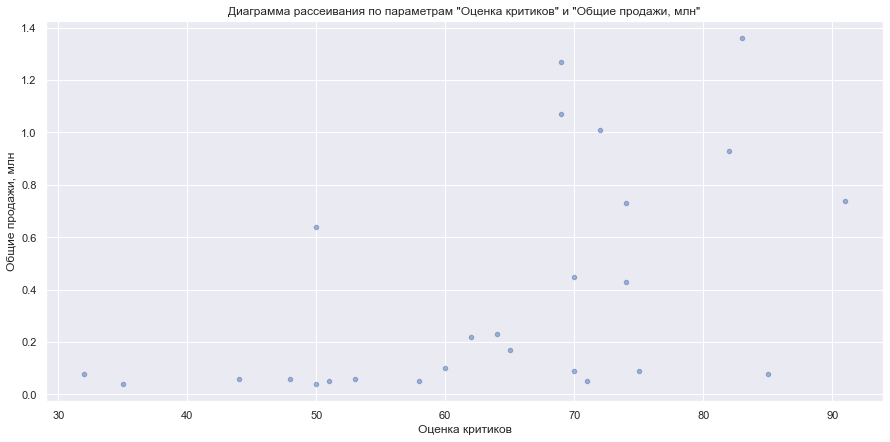

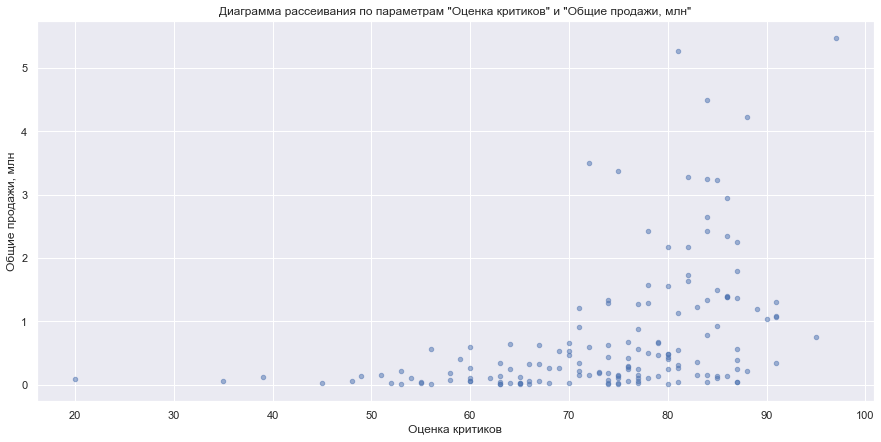

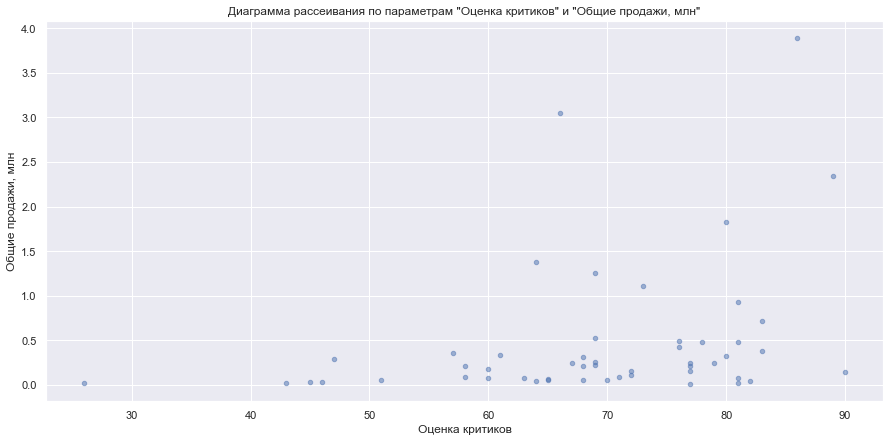

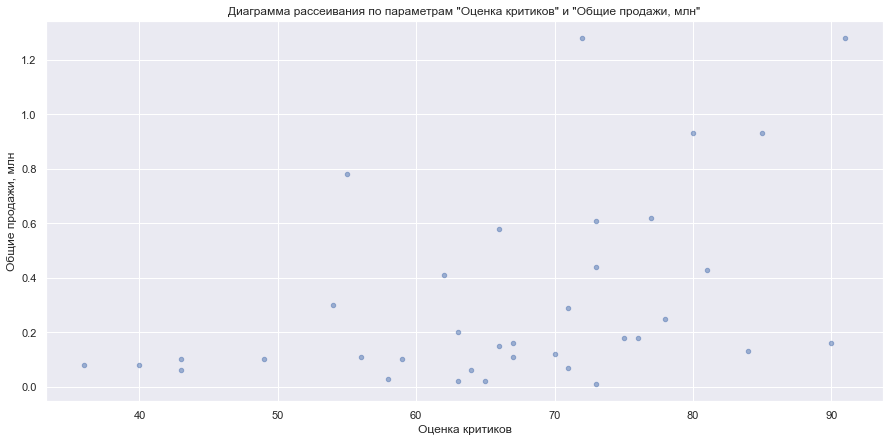

In [46]:
for plat in ['WiiU', 'X360', 'XOne', '3DS', 'PS3']:  
    data_din.loc[data_din['platform'] == plat].plot(
    x='critic_score', 
    y='total_sales',
    kind='scatter', 
    alpha=0.5, 
    grid=True, 
    title='Диаграмма рассеивания по параметрам "Оценка критиков" и "Общие продажи, млн"',
    xlabel='Оценка критиков',
    ylabel='Общие продажи, млн');

In [47]:
for plat in ['WiiU', 'X360', 'XOne', '3DS', 'PS3']:
    print('Для платформы', plat, 'коэффициент корреляции между общими продажами и оценкой критиков составляет', \
         round(data_din.loc[data_din['platform'] == plat, 'total_sales'] \
               .corr(data_din.loc[data_din['platform'] == plat, 'critic_score']),2))

Для платформы WiiU коэффициент корреляции между общими продажами и оценкой критиков составляет 0.37
Для платформы X360 коэффициент корреляции между общими продажами и оценкой критиков составляет 0.53
Для платформы XOne коэффициент корреляции между общими продажами и оценкой критиков составляет 0.43
Для платформы 3DS коэффициент корреляции между общими продажами и оценкой критиков составляет 0.31
Для платформы PS3 коэффициент корреляции между общими продажами и оценкой критиков составляет 0.45


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

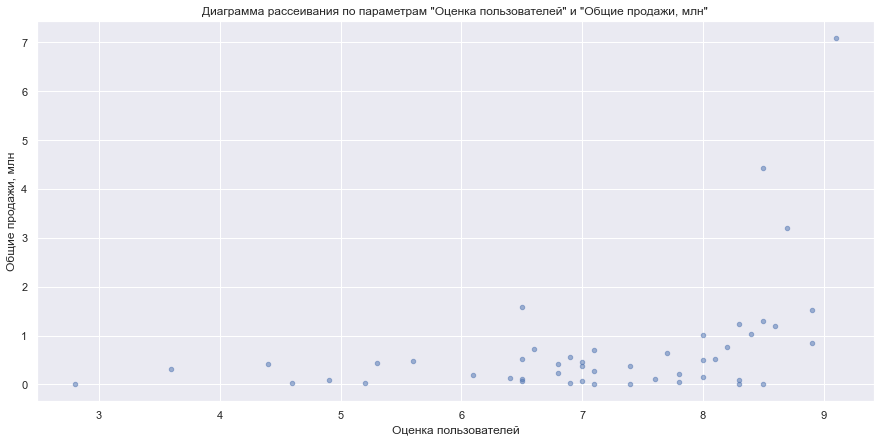

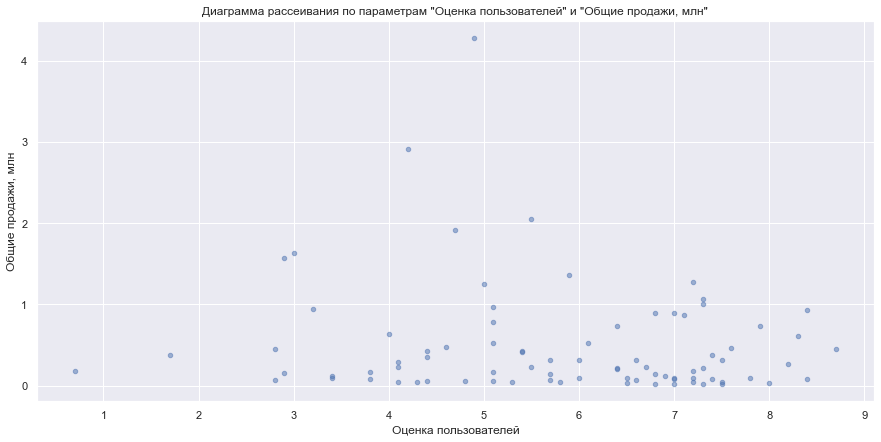

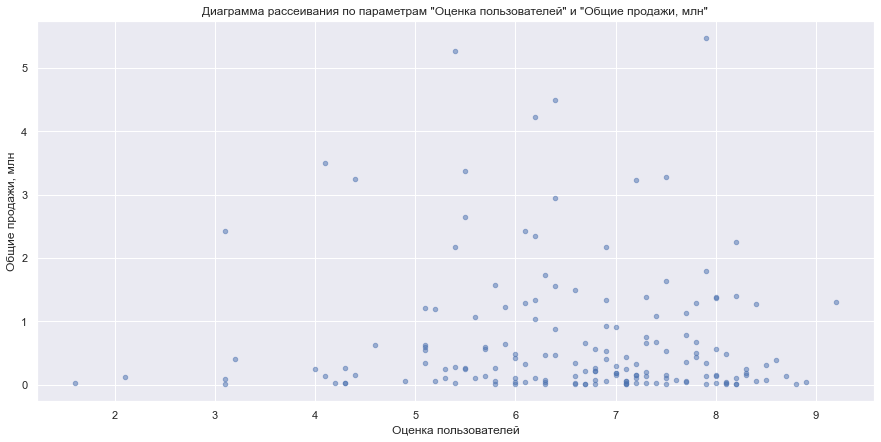

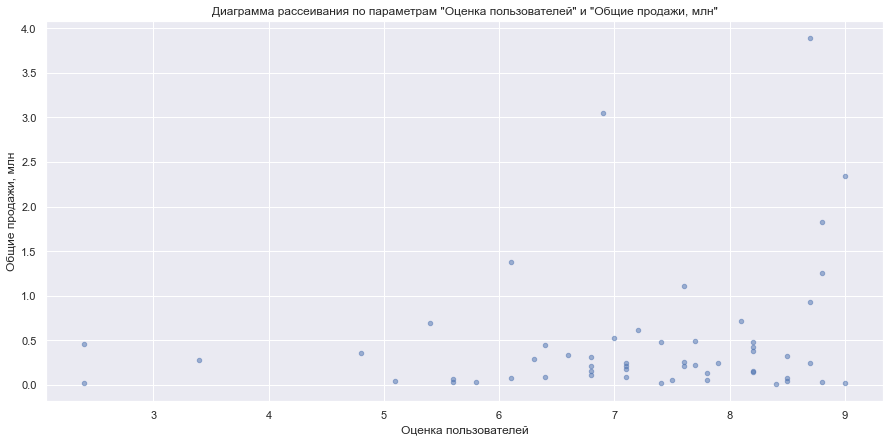

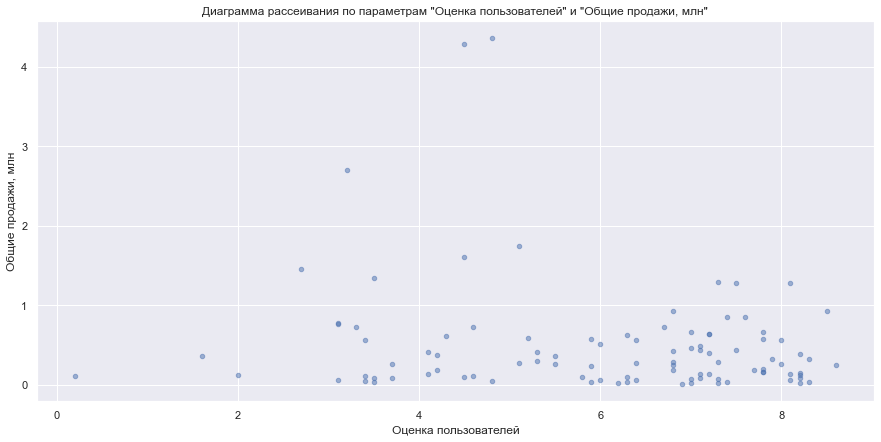

In [48]:
for plat in ['WiiU', 'X360', 'XOne', '3DS', 'PS3']:
    data_din.loc[data_din['platform'] == plat].plot(
    x='user_score', 
    y='total_sales',
    kind='scatter', 
    alpha=0.5, 
    grid=True, 
    title='Диаграмма рассеивания по параметрам "Оценка пользователей" и "Общие продажи, млн"',
    xlabel='Оценка пользователей',
    ylabel='Общие продажи, млн');

In [49]:
for plat in ['WiiU', 'X360', 'XOne', '3DS', 'PS3']:
    print('Для платформы', plat, 'коэффициент корреляции между общими продажами и оценкой пользователей составляет', \
         round(data_din.loc[data_din['platform'] == plat, 'total_sales'] \
               .corr(data_din.loc[data_din['platform'] == plat, 'user_score']),2))

Для платформы WiiU коэффициент корреляции между общими продажами и оценкой пользователей составляет 0.41
Для платформы X360 коэффициент корреляции между общими продажами и оценкой пользователей составляет -0.14
Для платформы XOne коэффициент корреляции между общими продажами и оценкой пользователей составляет -0.07
Для платформы 3DS коэффициент корреляции между общими продажами и оценкой пользователей составляет 0.22
Для платформы PS3 коэффициент корреляции между общими продажами и оценкой пользователей составляет -0.17


Общая картина подтвердилась. Для потенциальных покупателей компьютерных игр мнение критиков оказывается важнее мнения других пользователей, что в свою очередь отражается на общих объемах продаж. Единственным исключением является существующая зависимость между общими продажами и оценкой пользователей у платформы WiiU.

###  Общее распределение игр по жанрам

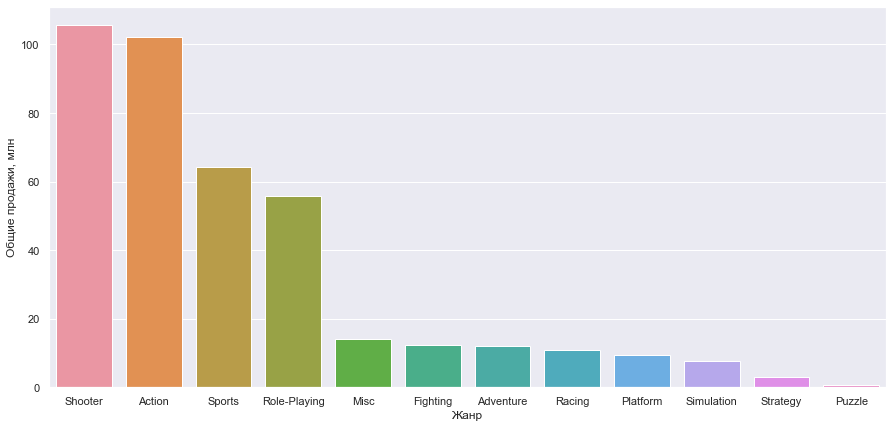

In [50]:
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(data=data_new, x='genre', y='total_sales', estimator=sum, ci=None, \
            order=data_new.groupby('genre')['total_sales'].agg('sum').sort_values(ascending=False).index)
plt.xlabel('Жанр')
plt.ylabel('Общие продажи, млн')
plt.show()

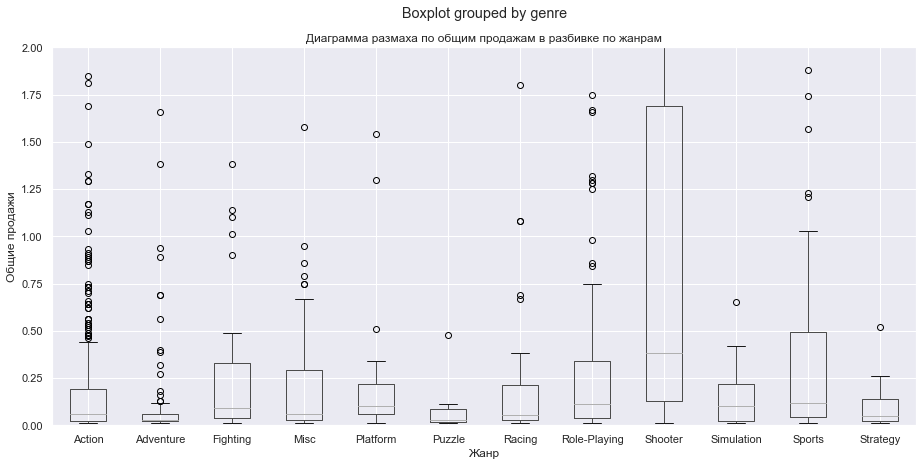

In [51]:
data_new.boxplot(
    column='total_sales', 
    by='genre',
    grid=True)
plt.xlabel('Жанр')
plt.ylabel('Общие продажи')
plt.title('Диаграмма размаха по общим продажам в разбивке по жанрам')
plt.ylim(0,2)
plt.show()

In [52]:
data_new.groupby('genre')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,431.0,0.236961,0.525858,0.01,0.0200,0.060,0.190,4.62
Adventure,110.0,0.108909,0.254260,0.01,0.0200,0.030,0.060,1.66
Fighting,37.0,0.334324,0.549695,0.01,0.0400,0.090,0.330,2.78
Misc,71.0,0.199577,0.286718,0.01,0.0300,0.060,0.290,1.58
Platform,28.0,0.331429,0.667387,0.01,0.0575,0.100,0.220,3.21
Puzzle,7.0,0.102857,0.170070,0.01,0.0150,0.030,0.085,0.48
Racing,42.0,0.258571,0.497342,0.01,0.0300,0.055,0.215,2.42
Role-Playing,132.0,0.422879,1.028082,0.01,0.0400,0.115,0.340,7.17
Shooter,81.0,1.305309,2.227297,0.01,0.1300,0.380,1.690,14.63


По графику распределения общих доходов по жанрам, можно сделать вывод:
- наибольшее количество проданных копий приходится на жанр "Шутер", за рассматриваемый период общие продажи игр в этом жанре составили около 100 млн копий, далее идут игры в жанре "Экшн" и замыкает тройку лидеров игры в жанре "Спорт".
- наименее популярными среди геймеров являются "Головоломки" и игры с жанром "Стратегии" и "Симуляторы".

При этом, диаграмма размаха по общим продажам в разбивке по жанрам показывает, что не все так однозначно:
- самая высокая медиана по продажам у игр в жанре "Шутер". За ним следует "Спорт", "Файтинги", "Ролевые игры". По размаху усов они также входят лидеры. Видимо, в жанре "Экшн", в свое время вышли несколько очень популярных игр, которые смогли вытянуть этот жанр на второе место по совокупным продажам, жирная черта выбросов это подтверждает.
- а вот в отстающих картина не меняется - самые низкие показатели у игр с жанрами "Головоломки", "Приключения" и "Стратегия".

### Вывод по разделу

По итогам исследовательского анализа представленного датасета можно сделать следующие выводы:
1. рынок компьютерных игр, начав свое бурное развитие в начале 1990х год, достигнув пика в 2008-2009 годах, на конец анализируемого периода находится в стадии упадка, хотя демонстрирует определенные признаки оживления с 2013 года.
2. в период с 1980-2016 крупнейшими платформами с наибольшими суммарными продажами являлись PS2, X360, PS3, Wii, DS и PS - 2/3 игр выпускались на этих игровых приставках.
3. в среднем жизненный цикл игровой платформы составляет около 10 лет.
4. в качестве актуального периода для целей проведения исследования был выбран период 2015-2016 гг.
5. в этот период в шестерку наиболее прибыльных платформ игровой индустрии входят PS4, WiiU, XOne, 3DS, PS3, X360.
6. для потенциальных покупателей компьютерных игр мнение критиков оказывается важнее мнения других пользователей, что в свою очередь отражается на общих объемах продаж.
7. в тройку наиболее популярных жанров входят "Шутер", "Экшн", и "Спорт". Наименее популярными среди геймеров являются "Головоломки" и игры с жанром "Стратегии", "Стимуляторы" и "Приключения".

## Портрет пользователя каждого региона

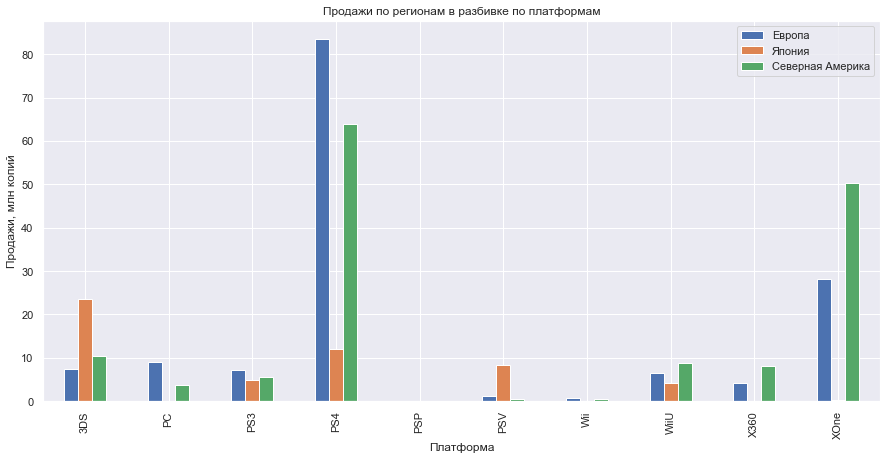

In [53]:
data_new.pivot_table(index='platform', values=['na_sales','eu_sales', 'jp_sales'], aggfunc='sum') \
    .plot(kind='bar', figsize=(15,7))
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн копий')
plt.title('Продажи по регионам в разбивке по платформам')
plt.legend(["Европа","Япония","Северная Америка"])
plt.show()

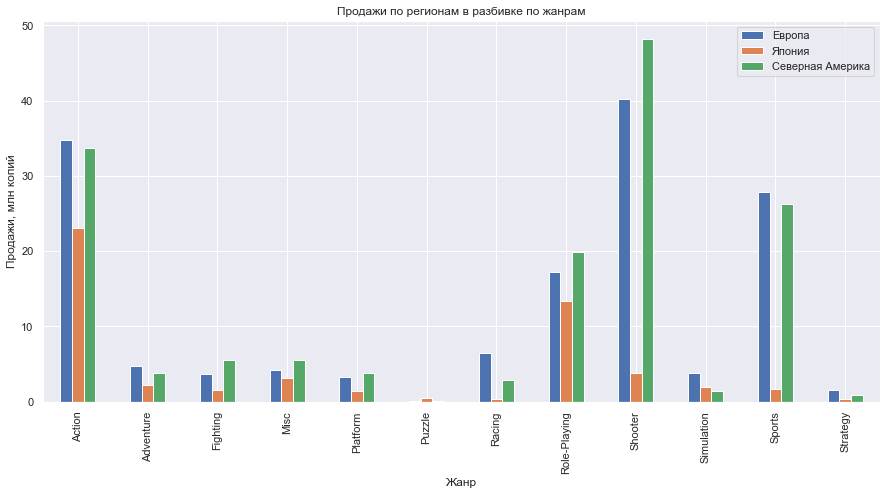

In [54]:
data_new.pivot_table(index='genre', values=['na_sales','eu_sales', 'jp_sales'], aggfunc='sum') \
    .plot(kind='bar', figsize=(15,7));
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн копий')
plt.title('Продажи по регионам в разбивке по жанрам')
plt.legend(["Европа","Япония","Северная Америка"])
plt.show()

На первый взгляд можно сделать вывод, что игровые предпочтения по части жанра и по части выбора игровой платформы у среднестатистического американца и европейца схожи, геймеры из Японии отличаются и по тому и по другому параметру. Проанализируем пользователя каждого региона более внимательно.

### Самые популярные платформы

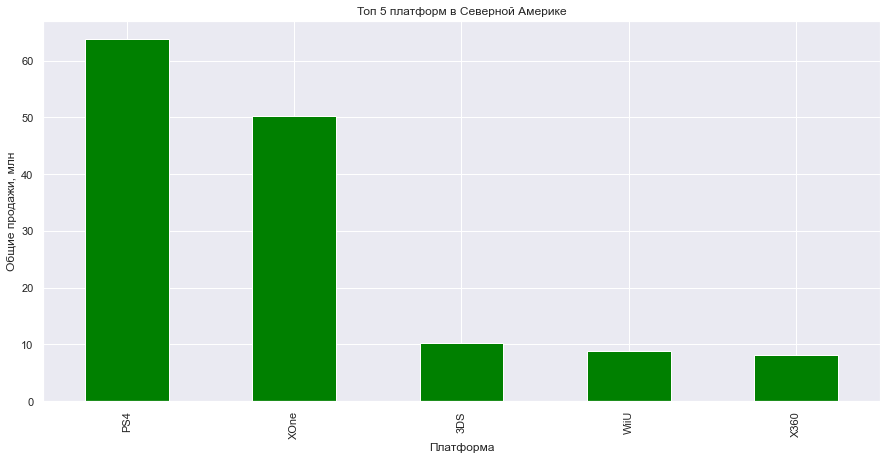

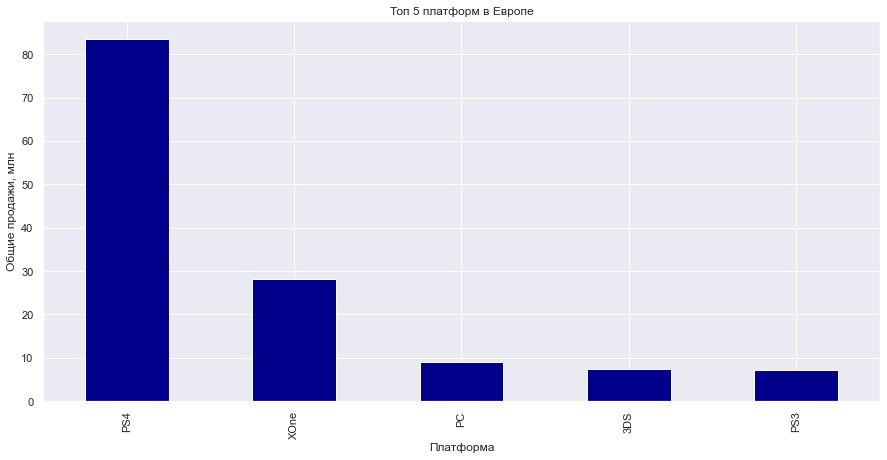

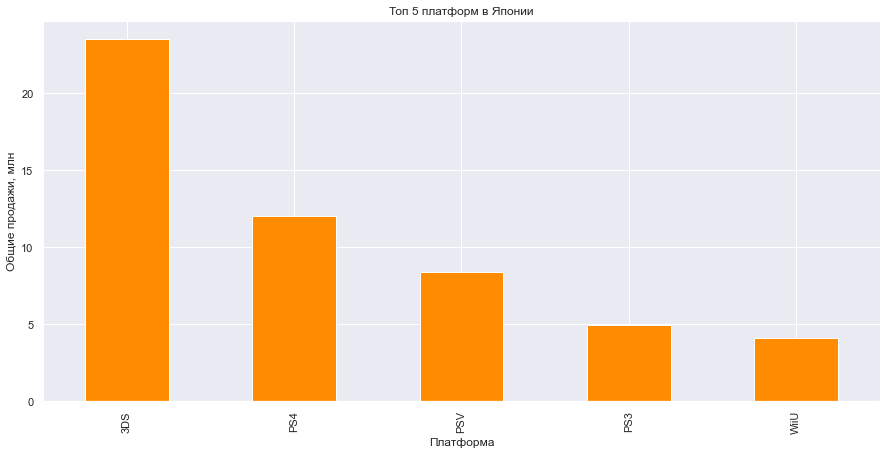

In [55]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    if region == 'na_sales':
        my_color = 'green'
    elif region == 'eu_sales':
        my_color = 'darkblue'
    else:
        my_color = 'darkorange'
    top5 = data_new.pivot_table(index='platform', values=region, aggfunc='sum')
    top5.columns = ['Общие продажи']
    top5.sort_values(by='Общие продажи', ascending=False) \
    .head(5) \
    .plot(kind='bar', legend=False, color=my_color)
    plt.ylabel('Общие продажи, млн')
    plt.xlabel('Платформа')
    if region == 'na_sales':
        plt.title('Топ 5 платформ в Северной Америке')
    elif region == 'eu_sales':
        plt.title('Топ 5 платформ в Европе')
    else:
        plt.title('Топ 5 платформ в Японии')
    plt.show()

В топ5 платформ Северной Америки вошли: PS4, Xone, 3DS, WiiU, X360. В лидеры европейского рынка, помимо общих с американским 3DS, PS4 и Xone, входят платформы PC и PS3. В Японии пользователи компьютерных игр предпочитают, помимо популярных в других регионах 3DS, PS4, также PSV, PS3 и WiiU.

Таким образом, в абсолютные любимчики мирового рынка входит только 2 платформы: 3DS, PS4.

### Самые популярные жанры

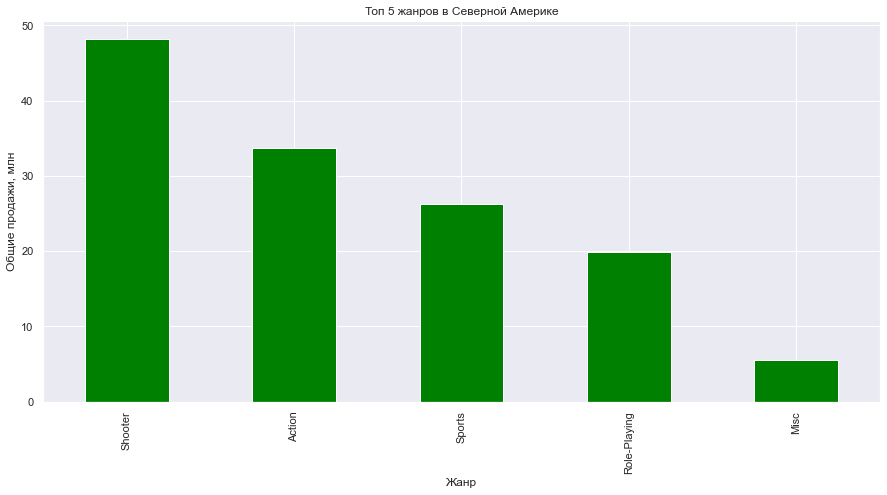

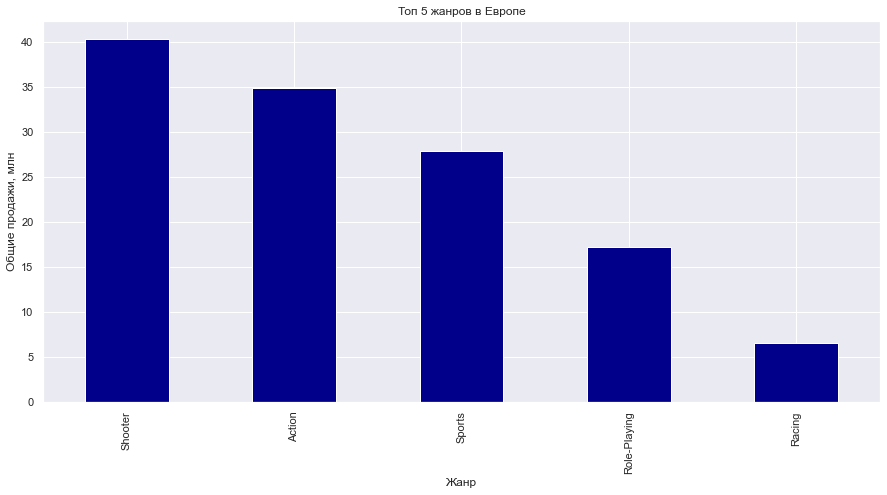

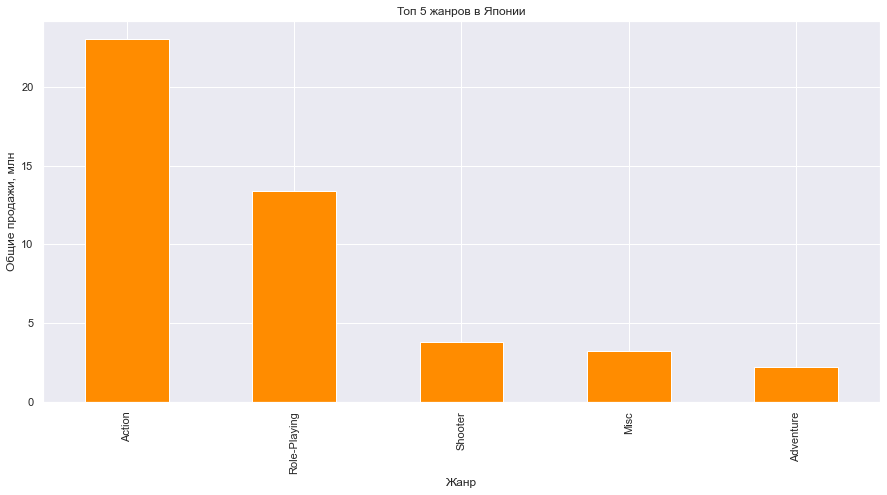

In [56]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    if region == 'na_sales':
        my_color = 'green'
    elif region == 'eu_sales':
        my_color = 'darkblue'
    else:
        my_color = 'darkorange'
    top5genre = data_new.pivot_table(index='genre', values=region, aggfunc='sum')
    top5genre.columns = ['Общие продажи']
    top5genre.sort_values(by='Общие продажи', ascending=False) \
    .head(5) \
    .plot(kind='bar', legend=False, color=my_color)
    plt.ylabel('Общие продажи, млн')
    plt.xlabel('Жанр')
    if region == 'na_sales':
        plt.title('Топ 5 жанров в Северной Америке')
    elif region == 'eu_sales':
        plt.title('Топ 5 жанров в Европе')
    else:
        plt.title('Топ 5 жанров в Японии')
    plt.show()

Топ 5 жанров у американской и европейской аудитории также схожи: в 4-ку лучших у обоих континентов входят Шутер, Экшн, Спортивные игры и Ролевые Игры. В Северной Америке также популярны Мультижанровые Игры, в Европе - Гонки.

В Японии пятерку лидеров возглавляет жанр Экшн, за ним следует Ролевые игры, Шутеры, Мультижанровые игры и Приключения.

### Влияние рейтинга ESRB на продажи 

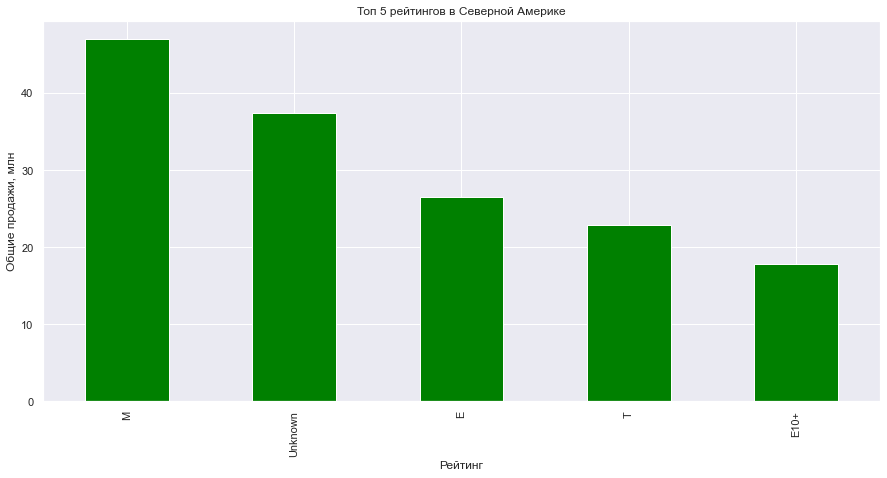

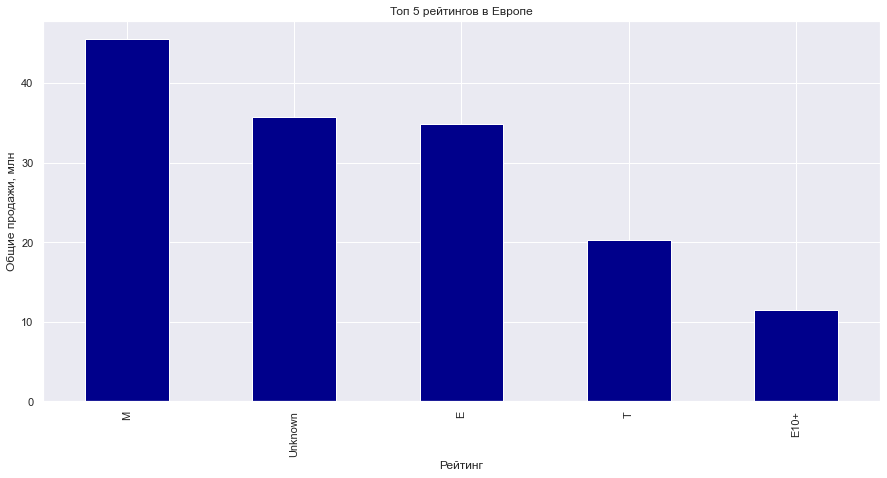

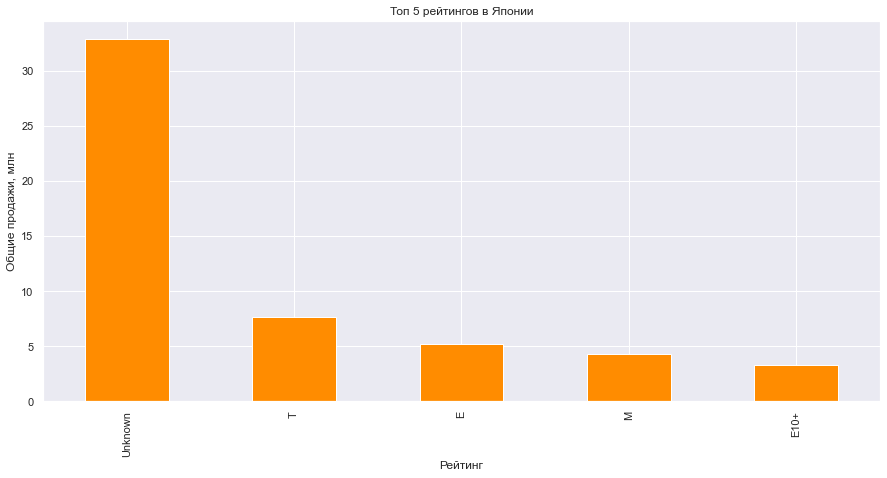

In [57]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    if region == 'na_sales':
        my_color = 'green'
    elif region == 'eu_sales':
        my_color = 'darkblue'
    else:
        my_color = 'darkorange'
    top5rate = data_new.pivot_table(index='rating', values=region, aggfunc='sum')
    top5rate.columns = ['Общие продажи']
    top5rate.sort_values(by='Общие продажи', ascending=False) \
    .plot(kind='bar', legend=False, color=my_color)
    plt.ylabel('Общие продажи, млн')
    plt.xlabel('Рейтинг')
    if region == 'na_sales':
        plt.title('Топ 5 рейтингов в Северной Америке')
    elif region == 'eu_sales':
        plt.title('Топ 5 рейтингов в Европе')
    else:
        plt.title('Топ 5 рейтингов в Японии')
    plt.show()

При анализе продаж каждого региона в разбивке по рейтингу наблюдаются следующие закономерности:
1. в каждом из рассматриваемых регионов полностью отсутствуют продажи игр с рейтингами EC(«Для детей младшего возраста») RP(«Рейтинг ожидается»). В первом случае все ясно, дети возрастом до 6 лет вряд ли могут себе позволить купить компьютерную игру, да и их родители это не одобрят. Во втором случае тоже все логично, логотип RP используется только на рекламных презентациях и в демо-версиях игр до официального релиза, поэтому продажи игр с этим рейтингом отсутствуют. 

2. интересная особенность наблюдается в продажах игр, у которых не был присвоен рейтинг. Это может быть обусловлено, прежде всего, страной происхождения рейтинговой организации ESRB - США. Там продажи игр без присвоенного рейтинга стоят на втором месте, также как и у европейцев, а у японских геймеров - на первом. 

3. в целом в Северной Америке и Европе картина идентичная: наиболее популярны игры с рейтингом М(«Для взрослых»), далее игры без присвоенного рейтинга, затем E(«Для всех»), T(«Подросткам») и E10+(«Для всех от 10 лет и старше»).

4. помимо значительного перевеса в сторону игр без присвоенного рейтинга, в Японии также отличается рейтинг популярности игр в зависимости возрастных ограничений. На втором месте T(«Подросткам»), затем  E(Для всех»),  и только потом  М(«Для взрослых»). Замыкает пятерку лидеров  E10+(«Для всех от 10 лет и старше»). Складывается впечатление, что среднестатистический геймер в Японии моложе, чем в Северной Америке и Японии, хотя нельзя утверждать однозначно, ввиду большого количества игр без присвоенного рейтинга.

Данная расстановка сил еще раз подтверждает предположение, высказанное в п. 2.3.1.1 исследования, о том, что, возможно, при выборе рейтинговой компании производитель игр, ориентируясь на определенный регион, останавливал свой выбор на альтернативном варианте (например, рейтинговых агентствах Японии и Европы).

### Вывод по разделу

В целом по анализу пользователей каждого из регионов можно сделать следующие выводы:

1. портреты среднестатистических игроков компьютерных игр в Северной Америке и Европе довольно схожи: 5ка любимых платформ совпадает на 30%, 5 любимых жанров - на 80%. 
2. японский пользователь чуть больше отличается в выборе платформ и также имеет отличие в выборе любимых жанрах, причем отличие связано преимущественно с расположением в рейтинге, сами позицици также схожы на 60-80%.
3. в разбивке по рейтингам европейские и американские пользователи одинаковы, в японском рынке на первом месте стоят продажи игр без рейтинга ESRB.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

```
H_0: Средние пользовательские рейтинги пользователей "Xbox One" = cредние пользовательские рейтинги пользователей "PC"`
H_a: Средние пользовательские рейтинги пользователей "Xbox One" ≠ cредние пользовательские рейтинги пользователей "PC"`
alpha = 0.05
```

In [58]:
from scipy import stats as st
results = st.ttest_ind(data_new[data_new['platform'] =='XOne']['user_score'].dropna(), \
                       data_new[data_new['platform'] =='PC']['user_score'].dropna(), equal_var=True) 

alpha = 0.05 

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.2778542084733835
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action и Sports разные

Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные;

```
H_0: Средние пользовательские рейтинги жанра "Action" = cредние пользовательские рейтинги жанра "Sports"`
H_a: Средние пользовательские рейтинги жанра "Action" ≠ cредние пользовательские рейтинги жанра "Sports"`
alpha = 0.05
```

In [59]:
from scipy import stats as st
results = st.ttest_ind(data_new[data_new['genre'] =='Action']['user_score'].dropna(), \
                       data_new[data_new['genre'] =='Sports']['user_score'].dropna(), equal_var=True)

alpha = 0.05 

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.0012846807938657e-13
Отвергаем нулевую гипотезу


### Вывод по разделу

В соответствии с проведенными расчетами можно утверждать, что:
1. пользователи в среднем ставят одинаковые оценки играм, которые выходили на платформах "Xbox One" и "PC".
2. средние пользовательские оценки игр в жанрах "Action" и "Sports" отличаются.

## Общий вывод по исследованию

В рамках данного исследования была поставлена задача — выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 
К анализу были предложены данные из открытых источников - исторические данные о продажах игр, включающие в себя информацию об оценках пользователей и экспертов, жанрах и платформах, на которых эти игры выпускались.
Исследование строилось в несколько этапов:

***1. Предобработка данных*** - работа с пропущенными значениями, изменение типа данных, устранение дубликатов, расчет новых значений, необходимых для последующего анализа.


***2. Исследовательский анализ данных.*** 
 - Был изучен рынок компьютерных игр фактически с момента его основания, за период более чем 30 лет. Фаза быстрого роста пришлась на начало 1990х годов, пик расцвета - на 2008-2009 года.
 - Основными крупными игроками за исследуемый период оказались PS2, X360, PS3, Wii, DS и PS, их доля рынка составляет до 2/3 от всего рынка игр.
 - В среднем жизненный цикл платформы составляет около 10 лет.
 - В шестерку наиболее прибыльных платформ игровой индустрии по актуализированным данным вошли PS4, WiiU, XOne, 3DS, PS3, X360, при этом платформы, которые показывают рост только 2 - Xone и PS4.
 - Для потенциальных покупателей компьютерных игр мнение критиков оказывается важнее мнения других пользователей.

 

***3. Составление и изучение портрета среднестатистического пользователя компьютерных игр в разрезе регионов***.
- портреты среднестатистических игроков компьютерных игр в Северной Америке и Европе довольно схожи: есть общие предпочтения по платформам и практически идентичные предпочтения по жанрам. В Топ-3 платформ у этих двух регионов входят 3DS, PS4 и Xone. На рынке Северной Америки также входит в лидеры Xone и WiiU, в Европе - PC и PS3. В 4-ку лучших у обоих континентов входят Шутер, Экшн, Спортивные игры и Ролевые Игры. В Северной Америке также популярны Мультижанровые Игры, в Европе - Гонки.
- в Японии в топ5 платформ входят 3DS, PS4, PSV, PS3 и WiiU. Наиболее популярные жанры у японских пользователей – Экшн, за ним следует Ролевые игры, Шутеры, Мультижанровые игры и Приключения.
- в разбивке по рейтингам европейские и американские пользователи также схожи. Наиболее популярны игры с рейтингом М(«Для взрослых»), далее игры без присвоенного рейтинга, затем E(«Для всех»), T(«Подросткам») и E10+(«Для всех от 10 лет и старше»).
- в японском рынке на первом месте стоят продажи игр без рейтинга ESRB. На втором месте T(«Подросткам»), затем  E(Для всех»),  и только потом  М(«Для взрослых»). Замыкает пятерку лидеров  E10+(«Для всех от 10 лет и старше»). Складывается впечатление, что среднестатистический геймер в Японии моложе, чем в Северной Америке и Японии, хотя нельзя утверждать однозначно, ввиду большого количества игр без присвоенного рейтинга.

Таким образом, в дальнейшем при построении прогноза на 2017 год целесообразно руководствоваться представленными выше выводами и при выборе продукта ориентироваться на жанры, платформы и рейтинги, наиболее популярные в соответствующем регионе, а также в любом случае, ориентироваться на отзывы критиков.